In [8]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# fcm

1003から関数化した

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み
iris = pd.read_csv("../../dataset/iris-dataset.csv")
df = iris.drop('species', axis=1)
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape

#クラスタ数宣言
c = 3
#Kはクラスタサイズ 
K = X_size /c
#交互最適化最大繰り返し数
max_iter = 100

#ファジィパラメーター設定
m = 3

#初期値繰り返し回数
NumberOfRepetitions= 50

In [10]:
#uの最適化部分関数作成(fcm)
def u_optimize(d,c,m):
    u = np.zeros((X_size,c))
    for i in range(X_size):
        #x_k != v_iの時
        if 0 not in d[i]:
            for j in range(c):
                for k in range(c):
                    u[i][j] = u[i][j] + (d[i][j]/d[i][k])**(1/(m-1))
                u[i][j]=1/u[i][j]
        #x_k=v_iの時
        else:
            for j in range(c):
                if d[i][j]==0:
                    u[i][j] = 1
                else:
                    u[i][j]=0
    return u

In [11]:
#クラスタ中心計算部分関数作成
def v_calculation(u_m,c,dimension,X):
    #分母計算(クラスタサイズになるはず)
    v_denominator = np.sum(u_m,axis=0)
    #分子計算
    v_numerator = np.zeros((c,dimension))
    for j in range(c):
        for i in range(X_size):
            v_numerator[j]+= u_m[i][j]*X[i]
   
    v = np.zeros((c,dimension ))
    for i in range(c):
        v[i] = v_numerator[i]/v_denominator[i]
    return v

In [12]:
for s in range (NumberOfRepetitions):
    print(f"{s+1}回目")
    centroids = X[np.random.choice(X_size,c)]
    for epoch in range(max_iter):
        #print(f"{epoch+1}回目")
        #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
        d = np.zeros((X_size,c))
        for i in range(X_size):
            d[i] = np.sum((X[i]-centroids)**2,axis=1)
        #uの更新
        u = u_optimize(d,c,m)
        u_m = u**m
        #Jの計算
        #目的関数の計算
        J=0
        for i in range(X_size):
            for j in range(c):
                J=J+u_m[i][j]*d[i][j]

        #vの更新
        new_centroids = v_calculation(u_m,c,dimension,X)

        # もしも重心が変わっていなかったら終了
        if np.sum(np.abs(new_centroids-centroids))<=0.000001:
            #print(new_centroids-centroids)
            print("中心が変わらないのでbreakします！")
            break
        centroids = np.copy(new_centroids)

    #目的関数が小さくなっている時、cluster,best_J,best_centoridsの更新を行う
    if s == 0:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    elif best_J > J:
        np_cluster = np.argmax(u,axis=1)
        #最適な目的関数の更新
        best_J = J
        #目的関数が小さくなるときの重心を格納
        best_centroids = np.copy(new_centroids)
        best_u = np.copy(u)
    print(f"{s+1}回目のクラスタリング結果↓")
    print(best_J)
    print(best_centroids)
    print("終了")
print(np_cluster)
print(best_J)
print(best_centroids)

1回目
中心が変わらないのでbreakします！
1回目のクラスタリング結果↓
29.11023838969866
[[5.00106653 3.38935647 1.49425962 0.25194824]
 [6.69509538 3.03751181 5.55144407 2.03544793]
 [5.90997308 2.79144757 4.37839841 1.39638153]]
終了
2回目
中心が変わらないのでbreakします！
2回目のクラスタリング結果↓
29.11023838969852
[[5.00106653 3.38935645 1.49425964 0.25194825]
 [5.90997371 2.79144777 4.37839922 1.39638192]
 [6.69509571 3.03751192 5.55144448 2.03544812]]
終了
3回目
中心が変わらないのでbreakします！
3回目のクラスタリング結果↓
29.110238389698388
[[5.00106653 3.38935647 1.49425962 0.25194824]
 [6.69509538 3.03751181 5.55144408 2.03544793]
 [5.90997309 2.79144757 4.37839842 1.39638154]]
終了
4回目
中心が変わらないのでbreakします！
4回目のクラスタリング結果↓
29.110238389698388
[[5.00106653 3.38935647 1.49425962 0.25194824]
 [6.69509538 3.03751181 5.55144408 2.03544793]
 [5.90997309 2.79144757 4.37839842 1.39638154]]
終了
5回目
中心が変わらないのでbreakします！
5回目のクラスタリング結果↓
29.110238389698388
[[5.00106653 3.38935647 1.49425962 0.25194824]
 [6.69509538 3.03751181 5.55144408 2.03544793]
 [5.90997309 2.79144757 4.37839842 1.3

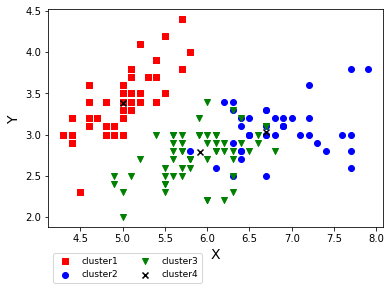

In [13]:
#matplotlibに描写

colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
for i in range(c):
    ax.scatter(X[:, 0][np_cluster==i], X[:, 1][np_cluster==i], color=colors[i],marker=markers[i])
ax.scatter(best_centroids[:,0],best_centroids[:,1],color="black",marker="x")
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3','cluster4','cluster5',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left')  # 凡例を表示

plt.show()

##　正解とのクラスター番号を合わせる作業セル

In [6]:
#正解リスト作成
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values
seikai

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
np_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2])

上記の二つのリストを比較してnp_clusterの番号を変更していく

In [14]:
cluster_hensyuu = np_cluster
cluster_hensyuu_0 = np.where(cluster_hensyuu==1, 100, cluster_hensyuu)
cluster_hensyuu_1 = np.where(cluster_hensyuu_0==2, 1, cluster_hensyuu_0)
cluster_hensyuu_2 = np.where(cluster_hensyuu_1==100, 2, cluster_hensyuu_1)
cluster_hensyuu_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1])

In [16]:
#------正解率の算出
dff = pd.read_csv("../../dataset/iris-dataset.csv")
size_mapping = {"setosa": 0, "versicolor": 1, "virginica": 2}
seikai = iris["species"].map(size_mapping).values

seikaisuu = np.count_nonzero(cluster_hensyuu_2==seikai)
seikairitu= (np.count_nonzero(cluster_hensyuu_2==seikai))/X_size*100
print("正解率")
print(seikairitu)
print("正解数")
print(seikaisuu)
print("クラスタサイズ確認")
print(np.count_nonzero(cluster_hensyuu_2==0))
print(np.count_nonzero(cluster_hensyuu_2==1))
print(np.count_nonzero(cluster_hensyuu_2==2))

正解率
90.0
正解数
135
クラスタサイズ確認
50
59
41


In [17]:
#引数(クラスタ数(c),クラスター(cluster),データセット(X),クラスター中心(v)、\
#ファジィ化パラム(m)、帰属度(u))

def calc_F(c,cluster,X,v,m,u):
    #中心間距離の作成
    center_distance = np.zeros((c,c))
    for i in range(c):
        for j in range(c):
            center_distance[i][j]= np.sum((v[i]-v[j])**2)
    print("center_distance")
    print(center_distance)
    #dにはd11,d12,d13,d14,d21,d22,,,dn1,,dncの順でリスト作る
    d_list=[]
    for i in range(X_size):
        for j in range(c):
            d_list.append(np.sum((X[i]-v[j])**2))
    d = np.array(d_list)
    d = d.reshape([X_size,c])
    print("d_{ki}")
    print(d[0])

    new_d = np.zeros((X_size,c))
    #ここが怪しい
    for i in range(c):
        new_d[cluster == i] = d[cluster == i]+center_distance[i]
    print("new_d{ki} = d_{ki}+d_{ii*}")
    print(new_d[0])

    #評価関数計算(ついでにJも再計算してあってるか確認)
    F = 0
    kakunin_J = 0
    u_m = u**m
    for i in range(X_size):
        F += np.sum(u[i] * new_d[i])
        kakunin_J += np.sum(u_m[i] * d[i])


    #この初期値のときの結果が優れている場合，bestを更新
    print("Jの値:",J)
    print("Jの値を再計算:",kakunin_J)
    print("Fの値:",F)
    return F

In [18]:
best_centroids

array([[5.00106653, 3.38935647, 1.49425962, 0.25194824],
       [6.69509539, 3.03751182, 5.55144409, 2.03544793],
       [5.90997311, 2.79144758, 4.37839845, 1.39638155]])

In [20]:
F = calc_F(c,np_cluster,X,best_centroids,m,best_u)
F

center_distance
[[ 0.         22.63514541 10.81159058]
 [22.63514541  0.          2.46140653]
 [10.81159058  2.46140653  0.        ]]
d_{ki}
[ 0.03361332 23.36158179 11.46028911]
new_d{ki} = d_{ki}+d_{ii*}
[3.36133186e-02 4.59967272e+01 2.22718797e+01]
Jの値: 29.110238389700243
Jの値を再計算: 29.11023838969678
Fの値: 834.0250861732663


834.0250861732663

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:
#pandasで分割結果を記入
df["cluster"]= np_cluster
df["u1"]=best_u[:,0]
df["u2"]=best_u[:,1]
df["u3"]=best_u[:,2]
df["J"] = best_J
df["F"] = F
df.to_csv('Iris-fcm.csv',index = False)

In [24]:
np.sum(best_u,axis=1)
np.sum(best_u,axis=0)

array([51.93894637, 46.49028654, 51.57076709])